# Assignment 2 (Sep 28)

Today's topics will include:

1. Python dictionary (`dict`) objects
2. Python `for` loops
3. Plotting in `matplotlib` using `Axes` objects
4. Simple polynomial fitting using `np.polyfit`

## Readings (optional)

If you find this week's material new or challenging, you may want to read through some or all the following resources while working on your assignment:

- [SPIRL Ch. 3.7 Loops](https://cjtu.github.io/spirl/python_loops.html#loops)
- [SPIRL Ch. 3.8.4 Dictionary (dict)](https://cjtu.github.io/spirl/python_adv-types.html?highlight=dictionary#dictionary-dict)
- [NumPy Polyfit Tutorial (7 mins)](https://www.youtube.com/watch?v=Dggl0fJJ81k&ab_channel=AdamGaweda)

## Python dictionary (`dict`) objects

In week 1, we talked about passing the `g` value into the `free_fall_h_grav` function so one can get the free fall distance on different planets in our Solar System.

However, what if we want to let the user supply the name of the planet instead of its `g` value?

In this section, we will use the Python dictionary (`dict` or in the form of `{}`) to do the job.

### WTD?!

A dictionary is Python's version of a "key-value" store data type, meaning we can access a `value` in a `dict` by supplying its `key` (or "name").

The following cell defines a new dictionary where each planet name is a `key` and each `g` value is... well... a `value`!

Notice the new syntax:
- Curly braces `{}` 
- Key-value pairs separated by `:`
- Different items separated by `,` (new line is optional but makes it easier to read)

In [2]:
planet_g_dict = {
    # key    : value
    'mercury': 3.61,
    'venus'  : 8.83,
    'earth'  : 9.80665,
    'mars'   : 3.75,
    'jupiter': 26.0,
    'saturn' : 11.2,
    'uranus' : 10.5,
    'neptune': 13.3,
}

We can access a `value` by giving its associated `key` in square brackets `[]`:

In [3]:
print(planet_g_dict['mars'])

3.75


Now you don't have to memorize or copy/paste every g-value! All you need is your `planet_g_dict` and the name of a planet!

Dictionaries have some useful methods like the `.keys()` and `.values()` methods shown below:

In [4]:
# Return all keys or values in a dict
print(planet_g_dict.keys())

print(planet_g_dict.values())


dict_keys(['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune'])
dict_values([3.61, 8.83, 9.80665, 3.75, 26.0, 11.2, 10.5, 13.3])


Note that these aren't regular lists, they are special `dict_keys()` and `dict_values()` objects. But it's pretty straightforward to convert them to the `lists` we know and love:

In [4]:
# Use `list` function to get a list of keys
planets = list(planet_g_dict.keys())
print(planets)

['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']


### Keys are case sensitive!

Be forewarned: dictionary keys are case-sensitive!

In [5]:
planet_g_dict['Earth']

KeyError: 'Earth'

To make sure we don't get an error if a user tries to pass in a Capitalized (or, heaven-forbid. an ALL CAPS) key, we can convert input strings to lowercase with the `str.lower()` method:

In [6]:
planet_name = 'Mars'
planet_name_lower = planet_name.lower()  # Convert to lowercase
print(planet_name_lower)
print(planet_g_dict[planet_name_lower])  # All good now :)

mars
3.75


## [Shortcut] `Zip` up two lists into a `dict`

Say we start with two lists one with `keys` and the other with `values` that we want to turn into a `dict`.

The long (but completely valid) way of doing this would be by adding each key-value pair to an empty `dict` using a `loop` (we'll cover loops in the next section!):

In [7]:
planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
planet_g = [3.61, 8.83, 9.80665, 3.75, 26.0, 11.2, 10.5, 13.3]
planet_g_dict = {}
for i in range(len(planets)):
    planet_g_dict[planets[i]] = planet_g[i]
planet_g_dict

{'mercury': 3.61,
 'venus': 8.83,
 'earth': 9.80665,
 'mars': 3.75,
 'jupiter': 26.0,
 'saturn': 11.2,
 'uranus': 10.5,
 'neptune': 13.3}

To simplify this process, we can use a Python function called `zip`. Let's see what happens when we `zip` our two lists:

In [8]:
zip(planets, planet_g)

Ok we got a `zip` object... but what's in there? Like before, let's convert this weird object to a list:

In [9]:
list(zip(planets, planet_g))

[('mercury', 3.61),
 ('venus', 8.83),
 ('earth', 9.80665),
 ('mars', 3.75),
 ('jupiter', 26.0),
 ('saturn', 11.2),
 ('uranus', 10.5),
 ('neptune', 13.3)]

Now we can see it paired up each planet with the associated g-value from the two lists!

Now what happens if we use the `dict` function instead of `list`?

In [10]:
planet_g_dict = dict(zip(planets, planet_g))
planet_g_dict

{'mercury': 3.61,
 'venus': 8.83,
 'earth': 9.80665,
 'mars': 3.75,
 'jupiter': 26.0,
 'saturn': 11.2,
 'uranus': 10.5,
 'neptune': 13.3}

Now we have a really quick way to make a dictionary from two associated lists!

## Global Variables

In Python, any variable that is outside of a function is called a `global` variable. While it's good practice to avoid global variables wherever possible, there is an important style guide to remember if you use `globals`:

- Always name `global` variables in **ALL_CAPS**. 
 
Using the **ALL_CAPS** convention helps us remember the `global` variable was defined somewhere different from our `local` variables. 

Let's define our `planet_g_dict` as a `global` variable and use it in our free-fall distance function from last week:

In [12]:
# Global variables should always be ALL CAPS
PLANETS = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
PLANET_G = [3.61, 8.83, 9.80665, 3.75, 26.0, 11.2, 10.5, 13.3]
PLANET_G_DICT = dict(zip(PLANETS, PLANET_G))


# Define our free-fall function with planet name as a parameter
def free_fall_dist_on_planet(t, planet='mars'):
    """
    Free fall distance given time t on given planet.

    Args:
        t (float or np.array): 
            Time in [s].
        planet (str, optional): 
            Planet to calculate the free-fall height for. Default: 'mars'.

    Returns:
        float or np.array: Free fall distance in [m].
    """
    planet = planet.lower()  # convert planet name to lower case
    g = PLANET_G_DICT[planet]  # get g from global dict
    H = 0.5 * g * t**2
    return H

# Call the function
print(free_fall_dist_on_planet(10, 'earth'))
print(free_fall_dist_on_planet(10, 'Neptune'))  # Works with caps now!
print(free_fall_dist_on_planet(10, 'VENUS'))  # Even all caps!

490.3325
665.0
441.5


## Python `for` loops

A `for` loop cycles through each element in a `list`, `array`, `tuple`, or other `iterable` and runs some commands **for** each one.

The anatomy of a `for` loop is:

- The `for` (it's in the name after all)
- The *loop variable* (this is what will change each cycle)
- The `iterable` (the thing we're looping through)
- An *indented block* (the commands we want to run multiple times in the loop)

See more on [Ch. 3.7 Loops](https://cjtu.github.io/spirl/python_loops.html#loops)

In [12]:
# Recall our planets list
planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']

# Below, "planet" is the loop variable and will be replaced by each planet in the list
for planet in planets:
    # Everything indented here will be run each time in the loop
    print('Hello', planet)

Hello mercury
Hello venus
Hello earth
Hello mars
Hello jupiter
Hello saturn
Hello uranus
Hello neptune


Sometimes it's more useful to have the *index* that we are on in the loop, rather than the actual value in the list.

E.g. `0`, then `1`, then `2`... rather than `mercury`, `venus`, `earth`...

We often use the function `range()` with for loops to get at the current index (generally called `i`).

In [13]:
range(10)

range(0, 10)

To see every element in this `range` object, we can again convert it to a `list`:

In [14]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The main uses of `range` are:
- `range(val)`: all integers from 0 to `val`-1
- `range(start_val, stop_val)`: all integers from `start_val` to `stop_val`-1
- `range(start, stop, step)`: all integers from `start` to `stop`-1 counting by `step`

In [15]:
# Print all odd numbers from 1 to 20
print('Without range:')
odd_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
for i in odd_list:
    print(i, end=' ')  # end=' ' prevents newline

print('\nWith range:')
for i in range(1, 20, 2):
    print(i, end=' ')

Without range:
1 3 5 7 9 11 13 15 17 19 
With range:
1 3 5 7 9 11 13 15 17 19 

Be mindful of whether you are using the *index* (e.g. with `range`) or looping through items directly when you make a `for` loop. Often we can get at the same info both ways

For example:

In [16]:
# Loop over planet names in the planets list
print('Loop over names')
planets = list(planet_g_dict.keys())
for planet in planets:
    g = planet_g_dict[planet]  # get the g value for each planet
    print(f'The g value for {planet:>8} is about {g:5.2f} m/s^2')


# Loop over the index of the planets list
print('\nLoop over indices:')
for i in range(len(planets)):
    planet = planets[i]  # get the planet name
    g = planet_g_dict[planet]  # get the g value for each planet
    print(f'The g value for {planet:>8} is about {g:5.2f} m/s^2')

Loop over names
The g value for  mercury is about  3.61 m/s^2
The g value for    venus is about  8.83 m/s^2
The g value for    earth is about  9.81 m/s^2
The g value for     mars is about  3.75 m/s^2
The g value for  jupiter is about 26.00 m/s^2
The g value for   saturn is about 11.20 m/s^2
The g value for   uranus is about 10.50 m/s^2
The g value for  neptune is about 13.30 m/s^2

Loop over indices:
The g value for  mercury is about  3.61 m/s^2
The g value for    venus is about  8.83 m/s^2
The g value for    earth is about  9.81 m/s^2
The g value for     mars is about  3.75 m/s^2
The g value for  jupiter is about 26.00 m/s^2
The g value for   saturn is about 11.20 m/s^2
The g value for   uranus is about 10.50 m/s^2
The g value for  neptune is about 13.30 m/s^2


## Plotting using `axis` objects

Here we will introduce the concept of `axes` in matplotlib. These are useful for making subplots and formatting specific portions of your plot area.

See [matplotlib color palette sheet](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py) for a list of colors we can use in matplotlib.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Below is a simple example of adding axes to a matplotlib Figure object.

1. Make the Figure with `plt.figure`
2. Add subplot `axes` to the Figure with `plt.subplot`
3. Plot different data on each subplot axis (called `ax1` and `ax2`)
4. Label each subplot axis also through `ax1` and `ax2`

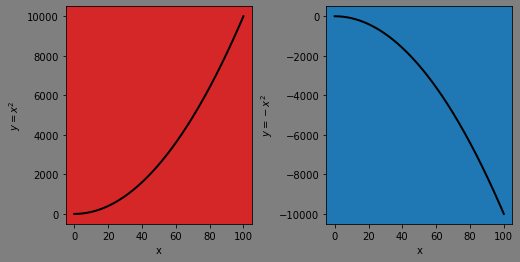

In [18]:
# Make the main Figure and color it gray
f = plt.figure(facecolor='tab:gray', figsize=(8,4))
f.subplots_adjust(wspace=0.4)

# Add in subplot axes (give them different colors so we can find them)
ax1 = plt.subplot(121, facecolor='tab:red')
ax2 = plt.subplot(122, facecolor='tab:blue')

x1 = np.linspace(0, 100, 1000)

# Plot on subplot 1
ax1.plot(x1, x1**2, lw=2, color='k')
ax1.set_xlabel('x')
ax1.set_ylabel('$y=x^2$')

# Plot on subplot 2
ax2.plot(x1, -x1**2, lw=2, color='k')
ax2.set_xlabel('x')
ax2.set_ylabel('$y=-x^2$')
plt.show()

Below we show an example using a `for` loop to plot different free-fall curves for each of our planets. 

Note: we only need to set the axis labels once and put the `.plot()` part in the loop.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


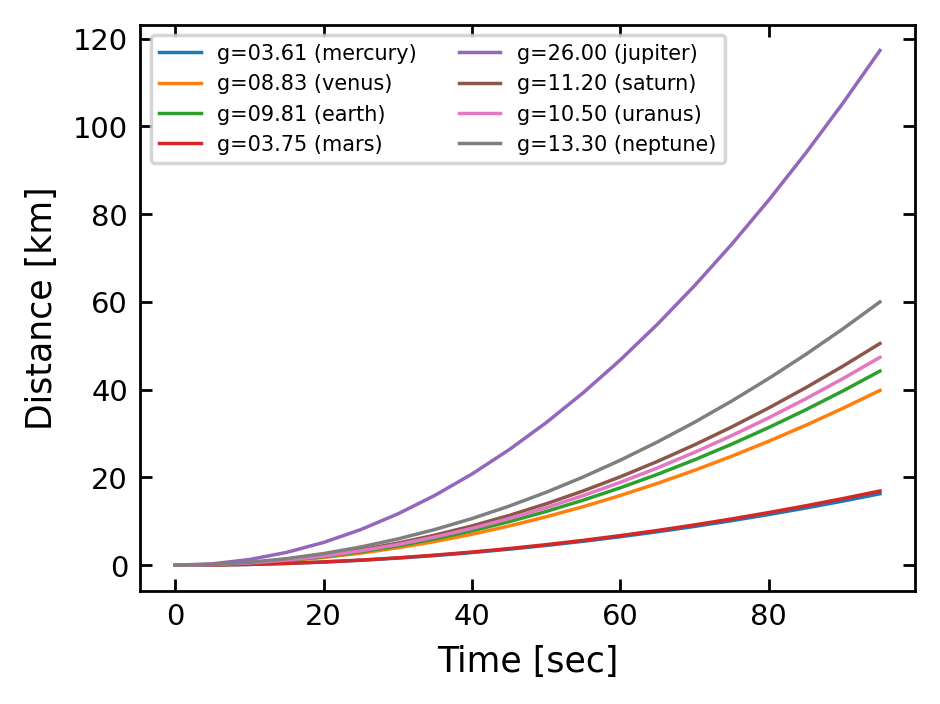

In [19]:
x = np.arange(0, 100, 5) # falling time [s]

# --- plotting setup ----
f = plt.figure(facecolor='white', figsize=(4,3), dpi=250)
ax1 = plt.subplot(111)


# --- plotting all free-fall curves for SS objects (planets) ----
for target in planets:
    y = free_fall_dist_on_planet(x, target)
    g = planet_g_dict[target]
    ax1.plot(x, y/1e3, '-', lw=1, label = f'g={g:05.2f} ({target})')
    

# --- plotting adjustments ---   
ax1.tick_params(axis='both', which='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('Time [sec]', size='medium', fontname='Helvetica')
ax1.set_ylabel('Distance [km]', size='medium', fontname='Helvetica')
ax1.legend(fontsize=6, ncol=2)
plt.show()

## Polynomial fitting using `np.polyfit`

We will explore simple fitting in Python using NumPy `polyfit`. 

For a more in depth video tutorial, see [NumPy Polyfit Tutorial (7 mins)](https://www.youtube.com/watch?v=Dggl0fJJ81k&ab_channel=AdamGaweda).

**Note:** We use `np.polyfit()` because it is a simple function, but NumPy recommends using the more advanced `numpy.polynomial.polynomial` library instead. You can read more about it [here](https://numpy.org/doc/stable/reference/routines.polynomials.html).

Like with any function, we can read the documentation right from Python with `help()`:

In [ ]:
help(np.polyfit)

Below we define some arrays that you can think of as `x` and `y` measurements from an experiment.

In [14]:
x = np.array([0, 3.448, 6.897, 10.345, 13.793, 17.241, 20.69, 24.138, 27.586, 31.034, 34.483, 37.931, 41.379, 44.828, 48.276, 51.724, 55.172, 58.621, 62.069, 65.517, 68.966, 72.414, 75.862, 79.31, 82.759, 86.207,  89.655,  93.103, 96.552, 100])
y = np.array([3.403, 12.761, 22.422, 34, 43.701, 58.525, 67.867, 71.998, 87.14, 86.822, 130.066, 79.842, 104.269, 119.987, 153.925, 86.582, 273.286, 119.237, 211.643, 270.858, 313.429, 253.465, 375.543,  65.478, 353.615, 346.736, 434.706, 343.462, 358.991, 477.203])
y_err = np.array([0.3, 1.334, 2.369, 3.403, 4.438, 5.472, 6.507, 7.541, 8.576, 9.61, 35.483, 38.931, 42.379, 45.828, 49.276, 52.724, 56.172, 59.621, 63.069,  66.517, 104.948, 110.121, 115.293, 120.466, 125.638, 130.81 , 135.983, 141.155, 146.328, 151.5])

We can plot `x`, `y`, and the y-errors `y_err` using the `ax.errorbar()` function.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


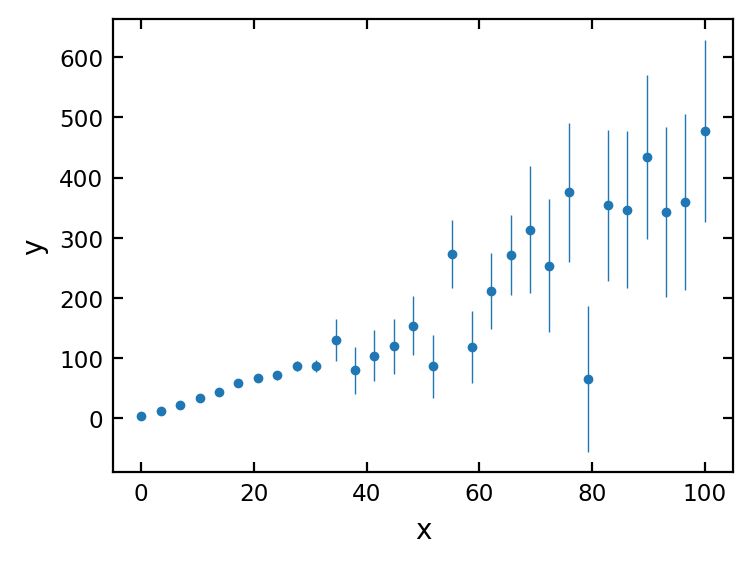

In [15]:
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200 )
ax1 = plt.subplot(111)

ax1.errorbar(x, y, yerr=y_err, fmt='.', ms=5, lw=0.5)
      
ax1.tick_params(axis='both', which='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('x', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('y', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
plt.show()

To fit a line to our data, we can use `np.polyfit(x, y, order)`, where order is the highest exponent in the polynomial we're fitting.

In [16]:
# Fit a 1st order (linear) polynomial to our x, y data
fit_coeffs = np.polyfit(x, y, 1)

print(fit_coeffs)

[  4.1371426  -28.15839687]


NumPy `polyfit` returns the coefficients of the of the fit from highest to lowest order. For example, our linear fit gave us the following equation of a line:

In [24]:
print(f'y = {fit_coeffs[0]:1.2f}x + {fit_coeffs[1]:1.2f}')

y = 4.14x + -28.16


## Convert `polyfit` coefficients to a function using `np.poly1d`

Another convenient NumPy function is `np.poly1d` which takes our `polyfit` coefficients and turns them into a function. This lets us create a new array from the equation of the line with any x values we choose.

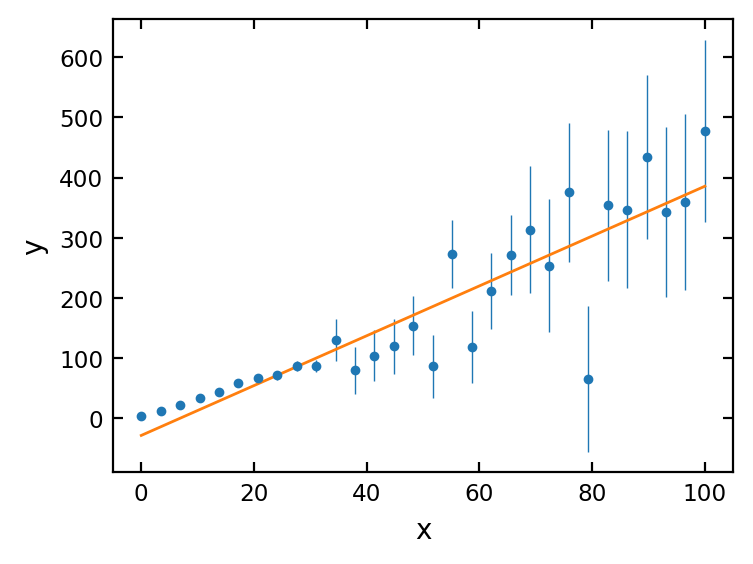

In [25]:
# --- plotting setup ----
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200)
ax1 = plt.subplot(111)

# --- plot the data with error ----
ax1.errorbar(x, y, yerr=y_err, fmt='.', ms=5, lw=0.5)

# --- fitting ---
coeffs = np.polyfit(x, y, 1)  # These are the linear coefficients
fit_linear = np.poly1d(coeffs)  # This returns a function object

# --- plot the fitted line ---
ax1.plot(x, fit_linear(x), '-', lw=1)  # We can call our function to draw the line
    
# --- plotting adjustments ---   
ax1.tick_params(axis='both', which='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('x', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('y', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
plt.show()

## Weighting a fit by its errors

A final useful parameter in `np.polyfit` is the **weights** parameter, `w`. This allows us to weight a fit by its errors.

In our case, we want to weight points with the smallest errors the highest in our fit so we supply `w=1/y_err` to `np.polyfit()`.

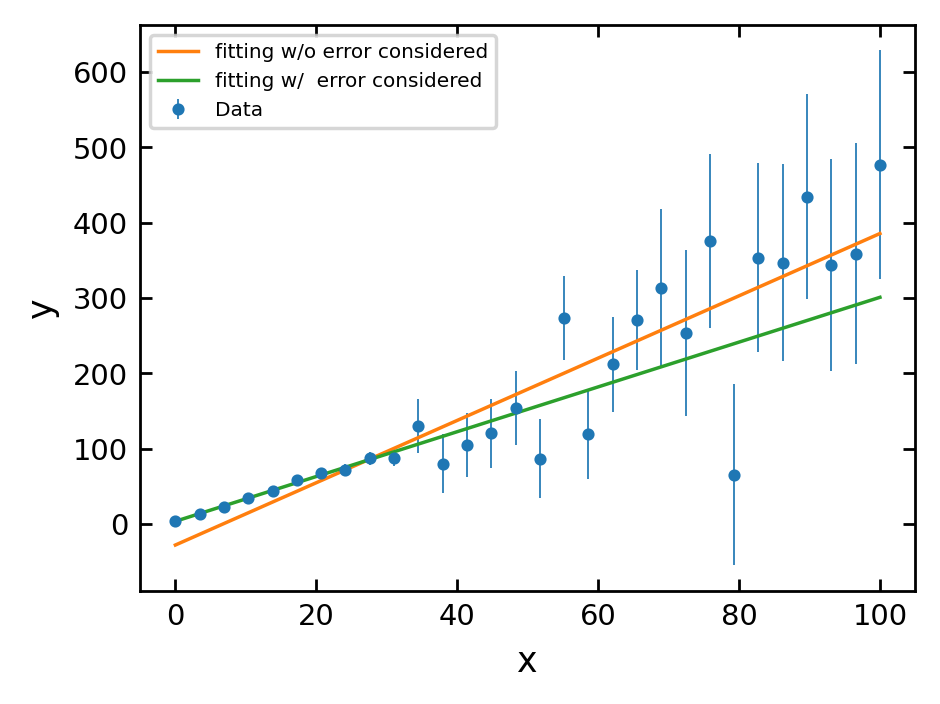

In [26]:
# --- plotting setup ----
f = plt.figure(facecolor='white', figsize=(4,3), dpi=250 )
ax1 = plt.subplot(111)

# --- plot the data with error ----
ax1.errorbar(x, y, yerr=y_err, fmt='.', ms=5, lw=0.5, label='Data')

# --- fitting ---
coeffs = np.polyfit(x, y, 1)
fit_linear = np.poly1d(coeffs)

# --- fitting with error as weight ---
coeffs_w = np.polyfit(x, y, 1, w=1/y_err)
fit_linear_w = np.poly1d(coeffs_w)

ax1.plot(x, fit_linear(x), '-', lw=1, label='fitting w/o error considered')
ax1.plot(x, fit_linear_w(x), '-', lw=1, label='fitting w/  error considered')
    
    
ax1.tick_params(axis='both', which='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('x', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('y', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.legend(fontsize = 'xx-small', loc = 'upper left')
plt.show()

## [Assignment] Determine the planet based on free-fall observations

Below are 30 data points taken from an object falling on a unknown Solar System planet by measuring the free-fall distance [m] and time [s].
Each data of the falling distance is an average value from 10 different measurements and their standard deviation is given as error, fall_distance_err [m].

1) Use `np.polyfit()` to fit the data with a quadratic (2nd order polynomial) function with **no weights**  (no `w=` parameter)
2) Obtain the `g` value from your fit coefficients.
3) Print the name of the most likely planet given `g` with the unweighted fit.
4) Plot the data with errorbars as well as your fit. 
5) Make a new `np.polyfit()` fit this time weighted by `y_err` (use the `w=` parameter).
6) Obtain the `g` value from your weighted fit.
7) Print the name of the most likely planet given `g` with the weighted fit.
8) Did you get a different answer? 

Make sure to label your plot axes and units. For extra practice, customize your plot to your liking and include the free fall equation using the `ax.annotate()` function.

Free-fall equation:

$$H = \frac{1}{2} g t^2$$


In [17]:
time_steps = np.array([20, 27.966, 35.931, 43.897, 51.862, 59.828, 67.793, 75.759, 83.724, 91.69, 99.655, 107.621, 115.586, 123.552, 131.517, 139.483, 147.448, 155.414, 163.379, 171.345, 179.31, 187.276, 195.241, 203.207, 211.172, 219.138, 227.103, 235.069, 243.034, 251])
fall_distance = np.array([2798.322, 4543.523, 5459.432, 11554.559, 15958.431, 20023.776, 19146.256, 22765.371, 47183.159, 47167.289, 22978.494, 66253.599, 63625.642, 91050.12, 116941.625, 143460.073, 106462.323, 142584.887, 199564.683, 83593.839, 158030.907, 205442.175, 206733.665, 241555.039, 236078.303, 240508.665, 311193.102, 298704.903, 339502.307, 438338.605])
fall_distance_err = np.array([448, 875.919, 1445.964, 2158.136, 3012.435, 4008.861, 5147.413,  6428.093,  7850.899,  9415.832, 18538.153, 21620.131, 24938.986, 28494.72 , 32287.332, 36316.821, 40583.189, 45086.435, 49826.558, 54803.56 , 18005.232, 19640.459, 21346.75 , 23124.104, 24972.521, 26892.002, 28882.547, 30944.154, 33076.825, 35280.56])

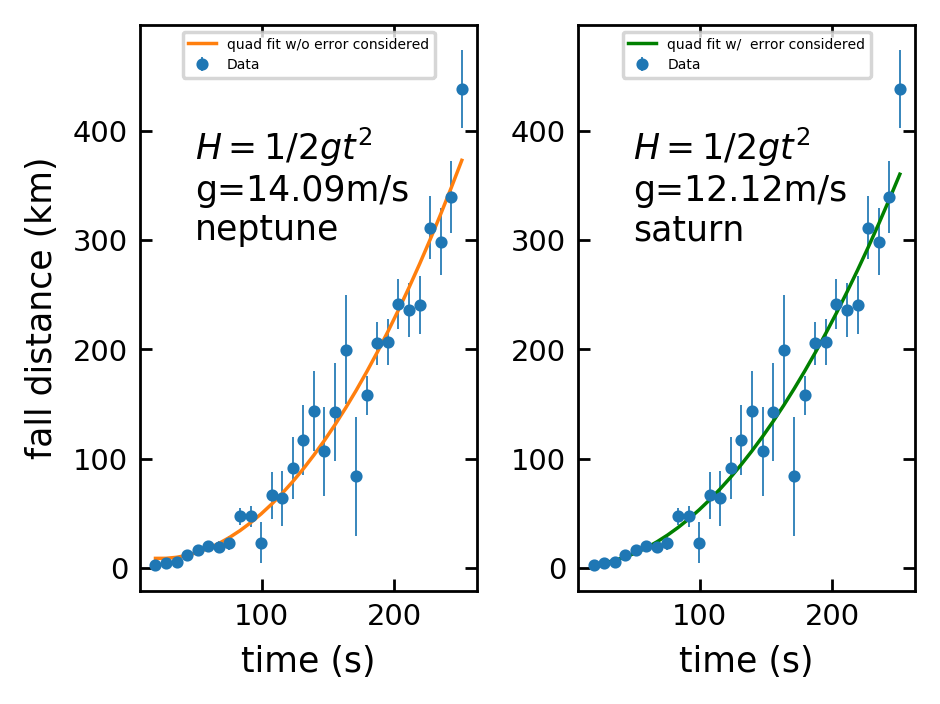

In [50]:
# [Your answer and plots here]
# --- plotting setup ----
f = plt.figure(facecolor='white', figsize=(4,3), dpi=250)
f.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(121)

# --- plot the data with error ----
ax1.errorbar(time_steps, fall_distance/1000, yerr=fall_distance_err/1000, fmt='.', ms=5, lw=0.5, label='Data')

# --- fitting ---
coeffs = np.polyfit(time_steps, fall_distance, 2)
fit_quad = np.poly1d(coeffs)

ax1.plot(time_steps, fit_quad(time_steps)/1000, '-', lw=1, label='quad fit w/o error considered')

# --- plotting setup ----
ax2 = plt.subplot(122)

# --- plot the data with error ----
ax2.errorbar(time_steps, fall_distance/1000, yerr=fall_distance_err/1000, fmt='.', ms=5, lw=0.5, label='Data')

# --- fitting with error as weight ---
coeffs_w = np.polyfit(time_steps, fall_distance, 2, w=1/fall_distance_err)
fit_quad_w = np.poly1d(coeffs_w)

ax2.plot(time_steps, fit_quad_w(time_steps)/1000, '-', c = 'green',lw=1, label='quad fit w/  error considered')

# --- finding planet with closest g value ---
PLANETS = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
PLANET_G = np.array([3.61, 8.83, 9.80665, 3.75, 26.0, 11.2, 10.5, 13.3])
PLANET_G_DICT = dict(zip(PLANETS, PLANET_G))
PLANET_G_DICT.values()
idx = (np.abs(PLANET_G - coeffs[0]*2)).argmin()
idx_w = (np.abs(PLANET_G - coeffs_w[0]*2)).argmin()

# --- plotting ---
ax1.tick_params(axis='both', which='both', labelsize='small', right=True, top=True, direction='in')   
ax2.tick_params(axis='both', which='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('time (s)', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax2.set_xlabel('time (s)', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('fall distance (km)', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.legend(fontsize = 4, loc = 'upper center')
ax2.legend(fontsize = 4, loc = 'upper center')
ax1.annotate(f'$H = 1/2gt^{2}$\ng={coeffs[0]*2:0.2f} m/s\n{PLANETS[idx]}',(50,300))
ax2.annotate(f'$H = 1/2gt^{2}$\ng={coeffs_w[0]*2:0.2f} m/s\n{PLANETS[idx_w]}',(50,300))
plt.show()
